## 机器学习预测波士顿房价

1. 随机方法获取 k 和 b
2. 方向监督方法获取 k 和 b
3. 梯度下降方法获取 k 和 b
4. 尝试不同的 loss 函数和学习率 

例如：

$Loss = \frac{1}{n} \sum(y_i - \hat{y_i})^2$

$Loss = \frac{1}{n} \sum(|{y_i - \hat{y_i}}|)$

$Loss = \sqrt{\frac{1}{n} \sum({y_i - \hat{y_i}})^2}$


### 了解数据集

In [2]:
from sklearn.datasets import load_boston

dataset = load_boston()

X, y = dataset['data'], dataset['target']

# 观察列信息
for line in dataset['DESCR'].split('\n'):
    print(line) # 平均房间数 RM 列即 X[:, 5]

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# 取出 RM 列
x_rm = X[:,5]

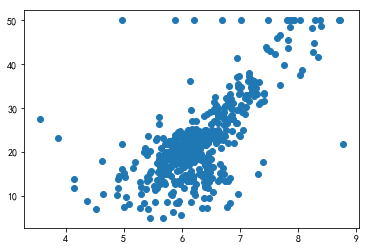

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# 观察相关性
plt.scatter(x_rm,y)

### 随机方法获取k和b

In [5]:
# 拟合模型：一元一次函数
def predict_price(x, k, b):
    return k*x+b

In [6]:
# 损失函数

# input list
def loss_MSE(Y, Y_hat):
    return sum( [ (y_i - y_hat_i)**2 / len(Y) for y_i,y_hat_i in zip(Y, Y_hat) ] ) 

In [7]:
import numpy as np

# 训练模型
def train_k_b_by_random(X, Y, trying_times = 100):
    min_loss = float('inf')
    best_k,best_b = None,None
    
    plt.scatter(X,Y)

    for i in range(trying_times):
        k = np.random.random() * 200 - 100
        b = np.random.random() * 200 - 100
        Y_hat = [predict_price(x,k,b) for x in X]
        current_loss = loss_MSE(Y, Y_hat)
        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = k, b
#             plt.scatter(X, Y_hat)
            plt.plot(X, Y_hat)
            print('found best_k:{} best_b:{} loss:{}'.format(best_k,best_b,min_loss))
            
    return best_k,best_b

found best_k:26.786642661460448 best_b:25.95507619969031 loss:29701.426670631827
found best_k:-3.3492788052673177 best_b:50.42791981723846 loss:166.85593767271584


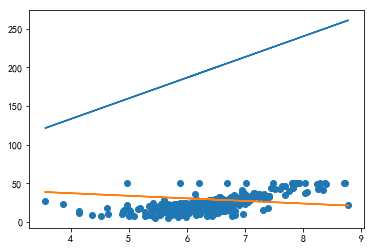

In [8]:
from sklearn.datasets import load_boston

dataset = load_boston()

Xs, Y = dataset['data'], dataset['target']

# 取出 RM 列
X_RM = Xs[:,5]

k,b = train_k_b_by_random(X_RM, Y)

### 方向监督方法获取k和b

found best_k:-37.88913237273339 best_b:-37.88913237273339 loss:90258.45628336126
found best_k:-36.88913237273339 best_b:-36.88913237273339 loss:85916.1819659937
found best_k:-35.88913237273339 best_b:-35.88913237273339 loss:81681.02483537332
found best_k:-34.88913237273339 best_b:-34.88913237273339 loss:77552.98489149989
found best_k:-33.88913237273339 best_b:-33.88913237273339 loss:73532.06213437357
found best_k:-32.88913237273339 best_b:-32.88913237273339 loss:69618.25656399425
found best_k:-31.889132372733393 best_b:-31.889132372733393 loss:65811.56818036191
found best_k:-30.889132372733393 best_b:-30.889132372733393 loss:62111.99698347676
found best_k:-29.889132372733393 best_b:-29.889132372733393 loss:58519.54297333845
found best_k:-28.889132372733393 best_b:-28.889132372733393 loss:55034.20614994733
found best_k:-27.889132372733393 best_b:-27.889132372733393 loss:51655.98651330316
found best_k:-26.889132372733393 best_b:-26.889132372733393 loss:48384.88406340603
found best_k:-25.

(3.1108676272666074, 3.1108676272666074)

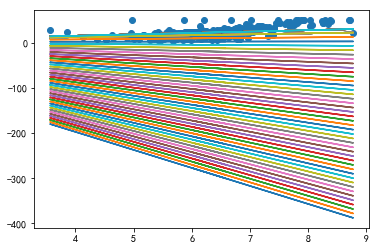

In [9]:
def find_right_dir(X, Y, directions, k, b, learning_rate = 0.5):
    min_loss = float('inf')
    best_k, best_b = None, None
    best_dir = None
    for direction in directions:
        current_k = k + direction[0]
        current_b = b + direction[1]
        Y_hat = [predict_price(x, current_k, current_b) for x in X]
        current_loss = loss_MSE(Y, Y_hat)
        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = current_k, current_b
            best_dir = direction
    return best_dir, best_k, best_b, min_loss, Y_hat
    
    
# 训练模型
def train_k_b_by_dir(X, Y, trying_times = 100, learning_rate = 0.5):
    min_loss = float('inf')
    best_k = best_b = np.random.random() * 200 - 100
    
    directions = [
      (+1, -1),
      (+1, +1),
      (-1, -1),
      (-1, +1)
    ]
    
    plt.scatter(X,Y)
        
    choice_dir = directions[np.random.randint(0,4)]

    for i in range(trying_times):
        # 更新方向
        best_dir, best_k, best_b, min_loss, Y_hat = find_right_dir(X, Y, directions, best_k, best_b, learning_rate)
        
#         plt.scatter(X, Y_hat)
        plt.plot(X,Y_hat)
        print('found best_k:{} best_b:{} loss:{}'.format(best_k,best_b,min_loss))
        
    return best_k,best_b

train_k_b_by_dir(X_RM, Y)

### 梯度下降法获取k和b
$$
Loss = \frac{1}{n} \sum(y_i - \hat{y_i})^2 \\
=\frac{1}{n} \sum(y_i - (kx_i+b))^2 \\
=\frac{1}{n} \sum y_i^2 - 2y_i(kx_i+b)+(kx_i+b)^2 \\
= \frac{1}{n} \sum y_i^2 - 2 y_{i}kx_i-2y_{i}b+k^2x_i^2+2kx_{i}b+b^2
$$

$$
\frac{\partial{Loss}}{\partial{k}} = \frac{1}{n} \sum 0-2y_{i}x_{i}-0+2x_i^2k+2x_{i}b+0 \\
= \frac{2}{n} \sum x_i^2k+bx_{i}-x_{i}y_{i} \\
= \frac{2}{n} \sum (kx_i+b-y_{i})x_i \\
= - \frac{2}{n} \sum (y_i-\hat{y_i})x_i
$$

$$
\frac{\partial{Loss}}{\partial{b}} = \frac{1}{n} \sum 0-0-2y_i+0+2x_{i}k+2b \\
= \frac{2}{n} \sum kx_{i}+b-y_i \\
= - \frac{2}{n} \sum (y_i-\hat{y_i})
$$

found best_k:27.253125094593575 best_b:44.73504597264946 loss:107835.74313912826
found best_k:15.004300504998527 best_b:42.80026430484125 loss:37639.72463600476
found best_k:7.775292094091269 best_b:41.65462429591521 loss:13185.674316220471
found best_k:3.5091146078535234 best_b:40.97475743553486 loss:4666.657392075425
found best_k:0.9916798310445958 best_b:40.569802901083875 loss:1698.8945893000875
found best_k:-0.4935998693775283 best_b:40.32710948363988 loss:665.0105291535087
found best_k:-1.3696738552290293 best_b:40.18018739917141 loss:304.82774781476263
found best_k:-1.8861782553094841 best_b:40.08979258252109 loss:179.34086871815987
found best_k:-2.1904550505430183 best_b:40.032762127176916 loss:135.61451078670612
found best_k:-2.3694694548439217 best_b:39.99542466049216 loss:120.37089649449595
found best_k:-2.4745506846596674 best_b:39.969710969285266 loss:115.04975837318666
found best_k:-2.5359946289121225 best_b:39.95085838609409 loss:113.18529502273844
found best_k:-2.571682

(-2.50307715697046, 39.15133777263839)

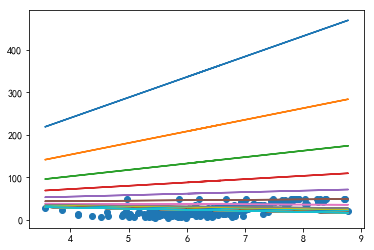

In [25]:
def partial_k(X, Y, Y_hat):
    return -2/len(X) * np.sum((np.array(Y) - np.array(Y_hat))*np.array(X))

def partial_b(X, Y, Y_hat):
    return -2/len(X) * np.sum(np.array(Y) - np.array(Y_hat))

# 训练模型
def train_k_b_by_gradient(X, Y, trying_times = 100, learning_rate = 0.005, loss = loss_MSE):
    min_loss = float('inf')
    best_k = best_b = np.random.random() * 200 - 100
        
    plt.scatter(X,Y)

    for i in range(trying_times):
        # 更新方向
        Y_hat = [predict_price(x, best_k, best_b) for x in X]
        best_k = best_k - partial_k(X, Y, Y_hat)*learning_rate
        best_b = best_b - partial_b(X, Y, Y_hat)*learning_rate
        min_loss =  loss(Y, Y_hat)
        
#         plt.scatter(X, Y_hat)
        plt.plot(X,Y_hat)
        print('found best_k:{} best_b:{} loss:{}'.format(best_k,best_b,min_loss))
        
    return best_k,best_b

train_k_b_by_gradient(X_RM, Y)

found best_k:26.70084094446066 best_b:26.88605301547062 loss:30328.364970628692
found best_k:26.482716425682504 best_b:26.851621361498193 loss:29834.665713234903
found best_k:26.26637971541254 best_b:26.81747076042685 loss:29349.025478293926
found best_k:26.05181616173687 best_b:26.783598908901443 loss:28871.312712299
found best_k:25.839011232820774 best_b:26.75000352244388 loss:28401.398009190678
found best_k:25.627950515924603 best_b:26.716682335298422 loss:27939.15407530238
found best_k:25.41861971642775 best_b:26.68363310027824 loss:27484.455694877965
found best_k:25.211004656860595 best_b:26.65085358861323 loss:27037.17969615268
found best_k:25.00509127594441 best_b:26.61834158979909 loss:26597.204917987496
found best_k:24.800865627639112 best_b:26.586094911447617 loss:26164.41217704806
found best_k:24.59831388019884 best_b:26.554111379138238 loss:25738.6842355195
found best_k:24.397422315235257 best_b:26.522388836270757 loss:25319.905769348432
found best_k:24.19817732678852 best_

(11.870810429799304, 24.540702678046188)

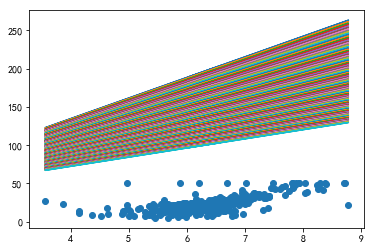

In [26]:
# 学习率过小，导致学习慢，到达loss最低点需要很长时间
train_k_b_by_gradient(X_RM, Y, learning_rate = 0.0001)

found best_k:-139.51143375822545 best_b:-4.833162073783747 loss:16075.638375368977
found best_k:1011.5761025201659 best_b:175.99570241093383 loss:828402.2155177481
found best_k:-7270.867647171917 best_b:-1126.1740686707356 loss:42886332.4998285
found best_k:52325.28710300932 best_b:8242.516274588263 loss:2220420853.481853
found best_k:-376496.31227518106 best_b:-59170.54015018994 loss:114961502992.20099
found best_k:2709072.5973627837 best_b:425896.40860826016 loss:5952091283688.299
found best_k:-19493015.51817066 best_b:-3064384.527195837 loss:308167427790041.3
found best_k:140261225.96913895 best_b:22049792.012540027 loss:1.595525992891887e+16
found best_k:-1009244059.8165566 best_b:-158658266.6709605 loss:8.260779577680317e+17
found best_k:7261975470.599908 best_b:1141619375.8805223 loss:4.276989502836915e+19
found best_k:-52253255442.05553 best_b:-8214476647.316483 loss:2.214396236500705e+21
found best_k:375986219712.95105 best_b:59106939887.09711 loss:1.1464958445598189e+23
found 

(9.915772216538695e+86, 1.5588096623030362e+86)

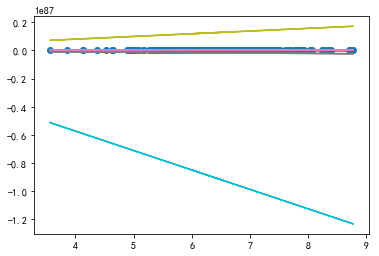

In [27]:
# 学习率过大，导致步伐过大总是跃过最低点，越来越偏离loss最低点
train_k_b_by_gradient(X_RM, Y, learning_rate = 0.1)

found best_k:55.11059060070841 best_b:92.80884874505404 loss:704.8947284801337
found best_k:28.700490964528182 best_b:88.64258919287983 loss:416.6259552174211
found best_k:13.113445979212589 best_b:86.1777704396966 loss:246.48187531832167
found best_k:3.914459855386493 best_b:84.71718866316435 loss:146.05817765322527
found best_k:-1.514121622999566 best_b:83.84933534962312 loss:86.7853313541237
found best_k:-4.7173086251081315 best_b:83.33132706755336 loss:51.80082820697648
found best_k:-6.60700785281219 best_b:83.01980746013 loss:31.407901392441193
found best_k:-7.721451254036916 best_b:82.83016373626268 loss:20.94272159734446
found best_k:-8.3783178513922 best_b:82.71245514285496 loss:15.904197322132378
found best_k:-8.765110378211725 best_b:82.63720529943775 loss:13.52696168743552
found best_k:-8.992498008421608 best_b:82.58701645060292 loss:12.35814959322791
found best_k:-9.12580067543682 best_b:82.55161997145719 loss:11.751775312829137
found best_k:-9.203571966940137 best_b:82.524

(-9.127082765444674, 81.28741914492356)

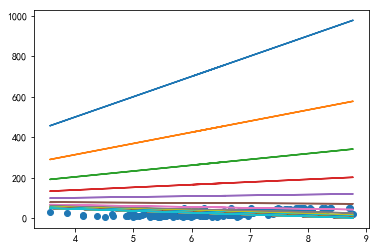

In [30]:
# 更换损失函数
def loss_ASE(Y, Y_hat):
    return sum( [ np.abs(y_i - y_hat_i) / len(Y) for y_i,y_hat_i in zip(Y, Y_hat) ] ) 

train_k_b_by_gradient(X_RM, Y, loss = loss_ASE)

found best_k:-42.06359547965425 best_b:-74.88525304503426 loss:615.9675693110752
found best_k:-19.07543323124192 best_b:-71.26752926527192 loss:363.61063690026856
found best_k:-5.507442516351611 best_b:-69.13070467299113 loss:214.69741747041917
found best_k:2.5005087369003682 best_b:-67.86794693677385 loss:126.86343810290266
found best_k:7.2267746628553455 best_b:-67.12108723610298 loss:75.12034936567407
found best_k:10.0161013647034 best_b:-66.67872466605908 loss:44.74572309051248
found best_k:11.662194287434286 best_b:-66.41608470679554 loss:27.088920660368508
found best_k:12.633519806901406 best_b:-66.25952206899436 loss:17.086494370975288
found best_k:13.206579422104703 best_b:-66.16556931518073 loss:11.748024749640477
found best_k:13.544571780565603 best_b:-66.10857079054233 loss:9.18635658692382
found best_k:13.743821128802677 best_b:-66.07338383513677 loss:8.10588332975001
found best_k:13.861180636912927 best_b:-66.05107084234115 loss:7.693803280359621
found best_k:13.9302065803

(13.97919563787768, -65.69434454312514)

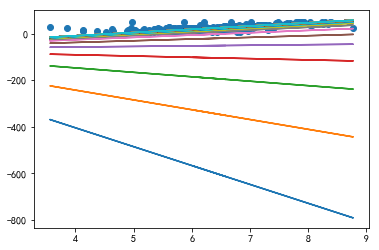

In [32]:
# 更换损失函数
def loss_SMSE(Y, Y_hat):
    return np.sqrt( sum( [ (y_i - y_hat_i)**2 / len(Y) for y_i,y_hat_i in zip(Y, Y_hat) ] ) )

train_k_b_by_gradient(X_RM, Y, loss = loss_SMSE)

## QA

###  为什么需要机器学习方法代替公式计算方法？

当想要求的函数非常复杂，很难求出这样的函数时，就要用机器学习方法来求这样的函数。

### 随机方法的缺点是什么？

想要求出最优解，就要随机尝试非常多次，虽然理论上无限尝试能够找出最优解，但是非常消耗时间。

### 方向监督方法是否比随机方法更好？方向监督方法的缺点是什么？

- 方向监督方法使得每次尝试都走在正确的方向上，所以比随机方法大幅度提高了效率，比随机方法更好。
- 方向监督方法的缺点是当想要求的函数非常复杂时，待搜索的方向空间非常大，很难快速找到正确方向。

### 为什么我们要使用导数/梯度来拟合出目标函数？

因为当目标函数非常复杂时，每次修改的方向就有很多种可能，使用导数/梯度就能快速找到正确的更新方向。

### 对于“梯度下降”，什么是“梯度”，什么是“下降”？

- 为了拟合目标函数，每次都需要根据loss函数值相对上一次是增大还是减小来判断当前前进方向是否正确。
- 正确的方向就是能够求得最优目标函数、使得loss函数值最小的方向。
- 而梯度就是对当前位置而言增长率最大的方向，其反方向就是能让loss函数值最大幅度降低的方向，下降就是向正确的方向前进。

### 梯度下降方法和随机方法、方向监督方法相比的优势是什么？

1. 节省了随机搜索的时间
2. 通过计算梯度得到了明确的方向，能适应复杂的目标函数

### 一句话概括机器学习？

机器学习就是根据未知函数的输入、输出数据来找出最可能的这个函数模型。

## 搜索策略问题 - 地铁路线搜索

Q：为什么使用BFS？DFS可以完成吗？哪个更好？

A：二者都可以找到可行路径。但是对于希望找到最短路径的场景，广度优先更容易先找到最短路径，而深度优先则容易先找到更长的路径。

### 数据爬取和处理

In [80]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd

HOME_URL = "https://dt.8684.cn"
CITY_HREFS = {
    'HZ': '/hz',
    'BJ': '/jb'
}

HEADERS = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36'
}

def crawl_city_subway(city_href, sess):
    city_href = CITY_HREFS['HZ']

    resp = sess.get(HOME_URL+city_href, headers = HEADERS)
    resp.encoding = resp.apparent_encoding
    soup = BeautifulSoup(resp.text)
    # print(soup.prettify())

    df_lines = pd.DataFrame(columns=['href', 'fullname', 'name', 'onbuild'])
    tags_li = soup.select('body > div.iContainer.clear > div.iMain > div:nth-child(2) > ul > li')
    for li in tags_li:
        df_lines.loc[df_lines.shape[0]] = {
            'href': li.find_all('a')[1]['href'],
            'fullname': li.find_all('a')[1].text,
            'name': li.find_all('a')[0].text,
            'onbuild': len(li.find_all('font')) != 0 and '未开通' in li.find_all('font')[0].text,
        } 
    # print(df_lines.head(df_lines.shape[0]))
    return df_lines

# soup: station web html
def _parse_station(soup, idx):
    tr = soup.select(f'body > div.iContainer.clear > div.iMain > div.ib-box.lm-box > div.ib-mn > table > tbody > tr:nth-child({idx+1})')[0]
    to_end_first_time = tr.find_all('td')[1].text,
    to_end_last_time =  tr.find_all('td')[3].text,
    to_start_first_time = tr.find_all('td')[2].text,
    to_start_last_time = tr.find_all('td')[4].text,
    
    is_start = idx==0
    is_end = idx == len(soup.select('body > div.iContainer.clear > div.iMain > div.ib-box.lm-box > div.ib-mn > div.routeMap > ul > li'))-1

    to_end_next = {}
    to_start_next = {}
    if not is_end:
        tr_next = soup.select(f'body > div.iContainer.clear > div.iMain > div.ib-box.lm-box > div.ib-mn > table > tbody > tr:nth-child({idx+2})')[0]
        to_end_next = {tr_next.find_all('a')[0]['href']: tr_next.find_all('a')[0].text}
    if not is_start:
        tr_previous = soup.select(f'body > div.iContainer.clear > div.iMain > div.ib-box.lm-box > div.ib-mn > table > tbody > tr:nth-child({idx})')[0]
        to_start_next = {tr_previous.find_all('a')[0]['href']: tr_previous.find_all('a')[0].text}
        
    return is_start, is_end, to_end_next, to_start_next, to_end_first_time, to_end_last_time, to_start_first_time,to_start_last_time
    
def _compute_idx_in_tags(tags, key_href):
    idx = None
    for i, tag in enumerate(tags):
        if tag.find_all('a')[0]['href'] == key_href:
            idx = i
            break
    return idx


def _parse_transfers(tags, idx):
    li = tags[idx]
    station_href = li.find_all('a')[0]['href']
    transfer_lines = {}
    transfer_stations = {}
    for a_line in li.find_all('p')[0].find_all('a'):
        #1
        transfer_lines[a_line['href']] = a_line.text
        #2
        resp = requests.get(HOME_URL+a_line['href'], headers = HEADERS)
        resp.encoding = resp.apparent_encoding
        soup = BeautifulSoup(resp.text)
        tags_station_li = soup.select('body > div.iContainer.clear > div.iMain > div.ib-box.lm-box > div.ib-mn > div.routeMap > ul > li')
        station_idx = _compute_idx_in_tags(tags_station_li, station_href)
        _, _, to_end_next, to_start_next, _, _, _, _, = _parse_station(soup, station_idx)
        transfer_stations = dict(transfer_stations, **to_end_next)
        transfer_stations = dict(transfer_stations, **to_start_next)
        
    return transfer_lines, transfer_stations
    
    
def crawl_line(line_href, line_name, sess):
    resp = sess.get(HOME_URL+line_href, headers = HEADERS)
    resp.encoding = resp.apparent_encoding
    soup = BeautifulSoup(resp.text)

    df_stations = pd.DataFrame(columns=[
        'is_start', 'is_end',
        'line_href', 'line_name',
        'station_href', 'station_name',
        'can_transfer', 'transfer_lines', 'transfer_stations',
        'to_end_first_time', 'to_end_last_time', 
        'to_start_first_time', 'to_start_last_time', 
        'relation_stations', 'to_end_next', 'to_start_next'
    ])
    
    tags_station_li = soup.select('body > div.iContainer.clear > div.iMain > div.ib-box.lm-box > div.ib-mn > div.routeMap > ul > li')
    for idx, li in enumerate(tags_station_li):

        can_transfer = li.get('class') != None and 'ride' in li.get('class')
        station_href, station_name = li.find_all('a')[0]['href'], li.find_all('a')[0].text
                    
        transfer_lines, transfer_stations = _parse_transfers(tags_station_li, idx) if can_transfer else ({},{})
        
        is_start, is_end, to_end_next, to_start_next, to_end_first_time, to_end_last_time, to_start_first_time,to_start_last_time = _parse_station(soup, idx)
        relation_stations = dict(to_end_next,**to_start_next)
        
        df_stations.loc[df_stations.shape[0]] = {
            'is_start': is_start,
            'is_end': is_end,
            'line_href': line_href,
            'line_name': line_name,
            'station_href': station_href,
            'station_name': station_name,
            'can_transfer': can_transfer,
            'transfer_lines': transfer_lines,
            'transfer_stations': transfer_stations,
            'to_end_first_time': to_end_first_time,
            'to_end_last_time':  to_end_last_time,
            'to_start_first_time': to_start_first_time,
            'to_start_last_time':  to_start_last_time,
            'relation_stations': relation_stations,
            'to_end_next': to_end_next,
            'to_start_next': to_start_next,
        } 
#     print(df_stations.head(df_stations.shape[0]))
    return df_stations

def crawl_city_subaway_lines(city_href, sess, to_csv=False):
    df_lines = crawl_city_subway(city_href, sess)
    tmp_dfs = []
    for idx, row in df_lines.loc[df_lines['onbuild']==False,['href','fullname']].iterrows() :
        line_href, line_name = row['href'], row['fullname']
        df_stations = crawl_line(line_href, line_name, sess)
        tmp_dfs.append(df_stations)
        prefix = city_href.split('/')[1]
        if to_csv: df_stations.to_csv(f'{prefix}${line_name}.csv', encoding="utf_8_sig")
    df_lines_stations = pd.concat(tmp_dfs, ignore_index=True)
    if to_csv: df_lines_stations.to_csv(f'{prefix}$subway_lines.csv', encoding='utf_8_sig')
    return df_lines_stations

with requests.Session() as sess:
    df_lines_stations = crawl_city_subaway_lines(CITY_HREFS['HZ'] , sess)


In [81]:
df_lines_stations

,is_start,is_end,line_href,line_name,station_href,station_name,can_transfer,transfer_lines,transfer_stations,to_end_first_time,to_end_last_time,to_start_first_time,to_start_last_time,relation_stations,to_end_next,to_start_next
0,True,False,/hz_x_121b6b09,杭州地铁1号线支线,/hz_z_98a478d8,客运中心,True,"{'/hz_x_121b6b09': '1号线支线', '/hz_x_e0eb83c8': ...","{'/hz_z_90f25e13': '乔司南', '/hz_z_e3333301': '下...","(06:10,)","(23:39,)","(--,)","(--,)",{'/hz_z_90f25e13': '乔司南'},{'/hz_z_90f25e13': '乔司南'},{}
1,False,False,/hz_x_121b6b09,杭州地铁1号线支线,/hz_z_90f25e13,乔司南,False,{},{},"(06:14,)","(23:43,)","(06:13,)","(22:56,)","{'/hz_z_e47c5816': '乔司', '/hz_z_98a478d8': '客运...",{'/hz_z_e47c5816': '乔司'},{'/hz_z_98a478d8': '客运中心'}
2,False,False,/hz_x_121b6b09,杭州地铁1号线支线,/hz_z_e47c5816,乔司,False,{},{},"(06:17,)","(23:46,)","(06:10,)","(22:53,)","{'/hz_z_bbdff92b': '翁梅', '/hz_z_90f25e13': '乔司南'}",{'/hz_z_bbdff92b': '翁梅'},{'/hz_z_90f25e13': '乔司南'}
3,False,False,/hz_x_121b6b09,杭州地铁1号线支线,/hz_z_bbdff92b,翁梅,False,{},{},"(06:20,)","(23:50,)","(06:07,)","(22:49,)","{'/hz_z_bd02340c': '余杭高铁站', '/hz_z_e47c5816': ...",{'/hz_z_bd02340c': '余杭高铁站'},{'/hz_z_e47c5816': '乔司'}
4,False,False,/hz_x_121b6b09,杭州地铁1号线支线,/hz_z_bd02340c,余杭高铁站,False,{},{},"(06:23,)","(23:53,)","(06:04,)","(22:47,)","{'/hz_z_35938f1f': '南苑', '/hz_z_bbdff92b': '翁梅'}",{'/hz_z_35938f1f': '南苑'},{'/hz_z_bbdff92b': '翁梅'}
5,False,False,/hz_x_121b6b09,杭州地铁1号线支线,/hz_z_35938f1f,南苑,False,{},{},"(06:26,)","(23:55,)","(06:02,)","(22:44,)","{'/hz_z_0e7c1447': '临平', '/hz_z_bd02340c': '余杭...",{'/hz_z_0e7c1447': '临平'},{'/hz_z_bd02340c': '余杭高铁站'}
6,False,True,/hz_x_121b6b09,杭州地铁1号线支线,/hz_z_0e7c1447,临平,False,{},{},"(--,)","(--,)","(06:00,)","(22:42,)",{'/hz_z_35938f1f': '南苑'},{},{'/hz_z_35938f1f': '南苑'}
7,True,False,/hz_x_e0eb83c8,杭州地铁1号线,/hz_z_a3f23831,湘湖,False,{},{},"(05:59,)","(22:40,)","(--,)","(--,)",{'/hz_z_62fb5bea': '滨康路'},{'/hz_z_62fb5bea': '滨康路'},{}
8,False,False,/hz_x_e0eb83c8,杭州地铁1号线,/hz_z_62fb5bea,滨康路,False,{},{},"(06:02,)","(22:42,)","(06:30,)","(23:47,)","{'/hz_z_580ffa16': '西兴', '/hz_z_a3f23831': '湘湖'}",{'/hz_z_580ffa16': '西兴'},{'/hz_z_a3f23831': '湘湖'}
9,False,False,/hz_x_e0eb83c8,杭州地铁1号线,/hz_z_580ffa16,西兴,False,{},{},"(06:04,)","(22:44,)","(06:27,)","(23:44,)","{'/hz_z_57122865': '滨和路', '/hz_z_62fb5bea': '滨...",{'/hz_z_57122865': '滨和路'},{'/hz_z_62fb5bea': '滨康路'}


In [82]:
dict_href_to_name = {}
dict_name_to_href = {}
dict_station_to_connected_stations = {}
use_href = False #无重名则用name
for i, row in df_lines_stations.iterrows():
    dict_href_to_name[row['station_href']] = row['station_name']
    dict_name_to_href[row['station_name']] = row['station_href']
    if use_href:
        if row['can_transfer']:
            dict_station_to_connected_stations[row['station_href']] = list(row['transfer_stations'].keys())
        else:
            dict_station_to_connected_stations[row['station_href']] = list(row['relation_stations'].keys())
    else:
        if row['can_transfer']:
            dict_station_to_connected_stations[row['station_name']] = list(row['transfer_stations'].values())
        else:
            dict_station_to_connected_stations[row['station_name']] = list(row['relation_stations'].values())
            
print('df_lines_stations 行数 = ', df_lines_stations.shape[0])
print('去重后站点href数 = ', len(dict_href_to_name.keys()))
print('去重后站点name数 = ', len(dict_name_to_href.keys()))#无重名站点
# dict_href_to_name
# dict_name_to_href
dict_station_to_connected_stations


df_lines_stations 行数 =  98
去重后站点href数 =  91
去重后站点name数 =  91


{'客运中心': ['乔司南', '下沙西', '九堡'],
 '乔司南': ['乔司', '客运中心'],
 '乔司': ['翁梅', '乔司南'],
 '翁梅': ['余杭高铁站', '乔司'],
 '余杭高铁站': ['南苑', '翁梅'],
 '南苑': ['临平', '余杭高铁站'],
 '临平': ['南苑'],
 '湘湖': ['滨康路'],
 '滨康路': ['西兴', '湘湖'],
 '西兴': ['滨和路', '滨康路'],
 '滨和路': ['江陵路', '西兴'],
 '江陵路': ['近江', '滨和路'],
 '近江': ['婺江路', '江陵路', '城星路', '甬江路'],
 '婺江路': ['城站', '近江'],
 '城站': ['定安路', '婺江路'],
 '定安路': ['龙翔桥', '城站'],
 '龙翔桥': ['凤起路', '定安路'],
 '凤起路': ['武林广场', '龙翔桥', '中河北路', '武林门'],
 '武林广场': ['西湖文化广场', '凤起路'],
 '西湖文化广场': ['打铁关', '武林广场'],
 '打铁关': ['闸弄口', '西湖文化广场'],
 '闸弄口': ['火车东站', '打铁关'],
 '火车东站': ['彭埠', '闸弄口', '新风'],
 '彭埠': ['七堡', '火车东站'],
 '七堡': ['九和路', '彭埠'],
 '九和路': ['九堡', '七堡'],
 '九堡': ['客运中心', '九和路'],
 '下沙西': ['金沙湖', '客运中心'],
 '金沙湖': ['高沙路', '下沙西'],
 '高沙路': ['文泽路', '金沙湖'],
 '文泽路': ['文海南路', '高沙路'],
 '文海南路': ['云水', '文泽路'],
 '云水': ['下沙江滨', '文海南路'],
 '下沙江滨': ['云水'],
 '良渚': ['杜甫村'],
 '杜甫村': ['白洋', '良渚'],
 '白洋': ['金家渡', '杜甫村'],
 '金家渡': ['墩祥街', '白洋'],
 '墩祥街': ['三墩', '金家渡'],
 '三墩': ['虾龙圩', '墩祥街'],
 '虾龙圩': ['三坝', '三墩'],
 '三坝': ['浙大紫金港'

In [83]:
def search(start, destination, connection_graph, sort):
    queue_paths = [[start]]
    
    gone_nodes = set()
    
    while queue_paths:
        current_path = queue_paths.pop(0)
#         print(current_path)
        current_node = current_path[-1]
        if current_node in gone_nodes:
            continue
        next_nodes = connection_graph[current_node]
        for next_node in next_nodes:
            next_path = current_path + [next_node]
            queue_paths.append(next_path)
            if next_node == destination:
                return next_path
        gone_nodes.add(current_node)
        queue_paths = sort(queue_paths)
    

### 搜索策略

例如输入：
```python
>>> search('奥体中心', '天安门') 
```
得到输出：

奥体中心-> A -> B -> C -> ... -> 天安门



In [77]:
def less_stations(paths):
    return sorted(paths, key=len)
# amp: can 1->4 20min or 2->4 21min, both 7 stations, now is 2->4
search('凤起路', '市民中心', dict_station_to_connected_stations, less_stations)

['凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江', '城星路', '市民中心']